In [169]:
import pandas as pd
import numpy as np

### Notice
Run ***data_reading.ipynb*** before running this notebook to ensure that the data is loaded.

# Hand-picking features to drop

Features are categorised into the following types:
- P - Transform DPD (Days past due)
- M - Masking categories
- A - Transform amount
- D - Transform date
- T - Unspecified Transform
- L - Unspecified Transform

Summary:
1. We will drop features that end with P as they are not closely related to a person, for easier analysis.
2. We will drop date features that are do not provide sufficient information by themselves without other features (e.g., assignmentdate does not provide any clue about whether a person is more likely to default without additional information).
3. We will drop categorical features that are related to the last application as their values are masked in this dataset, and hence difficult to analyse.

In [170]:
X_train = pd.read_pickle('data/X_train.pkl')
# get features in our dataset
features_in_dataset = X_train.columns
features_to_drop = []

In [171]:
feature_definitions = pd.read_csv('feature_definitions.csv')
# only keep features that are in our dataset
feature_definitions = feature_definitions[feature_definitions['Variable'].isin(features_in_dataset)]
feature_definitions

,Variable,Description
1,actualdpdtolerance_344P,DPD of client with tolerance.
14,amtinstpaidbefduel24m_4187115A,Number of instalments paid before due date in ...
17,annuity_780A,Monthly annuity amount.
19,annuitynextmonth_57A,Next month's amount of annuity.
20,applicationcnt_361L,Number of applications associated with the sam...
...,...,...
459,totalsettled_863A,Sum of all payments made by the client.
460,totinstallast1m_4525188A,Total amount of monthly instalments paid in th...
461,twobodfilling_608L,Type of application process.
463,typesuite_864L,Persons accompanying the client during the loa...


In [172]:
# look at features that end with P
feature_definitions[feature_definitions['Variable'].str.endswith('P')]

,Variable,Description
1,actualdpdtolerance_344P,DPD of client with tolerance.
30,avgdbddpdlast24m_3658932P,Average days past or before due of payment dur...
31,avgdbddpdlast3m_4187120P,Average days past or before due of payment dur...
32,avgdbdtollast24m_4525197P,Average days of payment before due date within...
33,avgdpdtolclosure24_3658938P,Average DPD (days past due) with tolerance wit...
36,avgmaxdpdlast9m_3716943P,Average Days Past Due (DPD) of the client in l...
261,maxdbddpdlast1m_3658939P,Maximum number of days past due in the last mo...
262,maxdbddpdtollast12m_3658940P,Maximum number of days past due in last 12 mon...
263,maxdbddpdtollast6m_4187119P,Maximum number of days past due in last 6 mont...
266,maxdpdfrom6mto36m_3546853P,Maximum Days Past Due (DPD) in the period rang...


We decide to drop all features that end with P as we focus on features more closely related to the person.

In [173]:
features_to_drop.extend(feature_definitions[feature_definitions['Variable'].str.endswith('P')]['Variable'])

In [174]:
# look at features that end with D
feature_definitions[feature_definitions['Variable'].str.endswith('D')]

,Variable,Description
27,assignmentdate_238D,Tax authority data - date of assignment.
28,assignmentdate_4527235D,Tax authority data - Date of assignment.
29,assignmentdate_4955616D,Tax authority assignment date.
41,birthdate_574D,Client's date of birth (credit bureau data).
116,datefirstoffer_1144D,Date of first customer relationship management...
117,datelastinstal40dpd_247D,Date of last instalment that was more than 40 ...
118,datelastunpaid_3546854D,Date of the last unpaid instalment.
119,dateofbirth_337D,Client's date of birth.
120,dateofbirth_342D,Client's date of birth.
158,dtlastpmtallstes_4499206D,Date of last payment made by the applicant.


We drop:
- assignmentdate_238D, assignmentdate_4527235D, assignmentdate_4955616D: These variables about tax authority assignment dates are likely administrative details with less direct relevance to default risk.
- datefirstoffer_1144D, firstclxcampaign_1125D, validfrom_1069D: Dates related to marketing or campaign activities may not directly influence a client's default likelihood.
- lastactivateddate_801D, lastapplicationdate_877D, lastapprdate_640D, lastrejectdate_50D: Specific application or contract dates are less impactful for assessing default risk compared to financial behavior or status.
- payvacationpostpone_4187118D: Date of last payment holiday might be less directly relevant to default risk analysis.
- responsedate_1012D, responsedate_4527233D, responsedate_4917613D: Response dates from tax authorities are administrative and less related to client's financial health or behavior.
- 
We keep:
- birthdate_574D, dateofbirth_337D, dateofbirth_342D: Client's date of birth is crucial for calculating age, a demographic factor that can influence default risk.
- datelastinstal40dpd_247D, datelastunpaid_3546854D: Dates of payment issues like last instalment more than 40 days past due or last unpaid instalment can help in assessing payment behavior.
- dtlastpmtallstes_4499206D, lastrepayingdate_696D: Dates of last payments made by the applicant can be used to assess recent financial behavior.
- lastdelinqdate_224D, maxdpdinstldate_3546855D: Dates related to delinquency and most severe past due instances are relevant for understanding risk patterns.

In [175]:
D_variables_to_drop = [
    "assignmentdate_238D",
    "assignmentdate_4527235D",
    "assignmentdate_4955616D",
    "datefirstoffer_1144D",
    "firstclxcampaign_1125D",
    "validfrom_1069D",
    "lastactivateddate_801D",
    "lastapplicationdate_877D",
    "lastapprdate_640D",
    "lastrejectdate_50D",
    "payvacationpostpone_4187118D",
    "responsedate_1012D",
    "responsedate_4527233D",
    "responsedate_4917613D"
]

features_to_drop.extend(D_variables_to_drop)

In [176]:
# look at features that end with M
feature_definitions[feature_definitions['Variable'].str.endswith('M')]

,Variable,Description
139,description_5085714M,Categorization of clients by credit bureau.
159,education_1103M,Level of education of the client provided by e...
161,education_88M,Education level of the client.
231,lastapprcommoditycat_1041M,Commodity category of the last loan applicatio...
232,lastapprcommoditytypec_5251766M,Commodity type of the last application.
235,lastcancelreason_561M,Cancellation reason of the last application.
240,lastrejectcommoditycat_161M,Category of commodity in the applicant's last ...
241,lastrejectcommodtypec_5251769M,Commodity type of the last rejected application.
244,lastrejectreason_759M,Reason for rejection on the most recent reject...
245,lastrejectreasonclient_4145040M,Reason for the client's last loan rejection.


We decide to drop categorical features that are related to the last application as their values are masked in this dataset, and hence difficult to analyse. 
We keep the education and marital status features as they are directly related to the person.

In [177]:
# drop features that start with last and end with M
features_to_drop.extend(feature_definitions[feature_definitions['Variable'].str.startswith('last') & feature_definitions['Variable'].str.endswith('M')]['Variable'])    
# also drop description
features_to_drop.append('description_5085714M')

In [178]:
# look at features that end with A
feature_definitions[feature_definitions['Variable'].str.endswith('A')]

,Variable,Description
14,amtinstpaidbefduel24m_4187115A,Number of instalments paid before due date in ...
17,annuity_780A,Monthly annuity amount.
19,annuitynextmonth_57A,Next month's amount of annuity.
34,avginstallast24m_3658937A,Average instalments paid by the client over th...
35,avglnamtstart24m_4525187A,Average loan amount in the last 24 months.
37,avgoutstandbalancel6m_4187114A,Average outstanding balance of applicant for t...
38,avgpmtlast12m_4525200A,Average of payments made by the client in the ...
101,credamount_770A,Loan amount or credit card limit.
112,currdebt_22A,Current debt amount of the client.
114,currdebtcredtyperange_828A,Current amount of debt of the applicant.


We drop:
- maxannuity_159A: Redundant with other annuity variables; keep the one that best represents financial commitment.
- currdebtcredtyperange_828A: Provides similar insights as total debt but less comprehensive; total debt offers a broader perspective.
- downpmt_116A: Less direct impact on default likelihood; focuses on initial loan terms rather than ongoing financial behavior.
- pmtaverage_3A, pmtaverage_4527227A, pmtaverage_4955615A: Complex financial metrics with less direct relevance to default likelihood.
- inittransactionamount_650A: Specific to loan terms and less informative about overall financial health and behavior.
- disbursedcredamount_1113A: Similar to loan amount variables; consider focusing on outstanding balances or total debt.
- lastotherlnsexpense_631A: Specific details on expenses from other loans; broader financial health indicators are more impactful.
- lastrejectcredamount_222A: Focuses on rejected applications; more relevant variables available that reflect actual financial behavior.
- maxdebt4_972A: Overlaps with total debt measures; total debt provides a clearer overview of financial obligations.
- price_1097A: Specific to the credit price, which might be less directly related to default likelihood than debt or payment behavior.

In [179]:
A_variables_to_drop = [
    "maxannuity_159A",
    "currdebtcredtyperange_828A",
    "downpmt_116A",
    "pmtaverage_3A",
    "pmtaverage_4527227A",
    "pmtaverage_4955615A",
    "inittransactionamount_650A",
    "disbursedcredamount_1113A",
    "lastotherlnsexpense_631A",
    "lastrejectcredamount_222A",
    "maxdebt4_972A",
    "price_1097A"
]

# drop features that are in A_variables_to_drop
features_to_drop.extend(A_variables_to_drop)

In [180]:
# look at features that end with T
feature_definitions[feature_definitions['Variable'].str.endswith('T')]

,Variable,Description


There are no features that end with T in our dataset.

In [181]:
# look at features that end with L
feature_definitions[feature_definitions['Variable'].str.endswith('L')]

,Variable,Description
20,applicationcnt_361L,Number of applications associated with the sam...
21,applications30d_658L,Number of applications made by the client in t...
22,applicationscnt_1086L,Number of applications associated with the sam...
23,applicationscnt_464L,Number of applications made in the last 30 day...
24,applicationscnt_629L,Number of applications with the same employer ...
...,...,...
436,sellerplacecnt_915L,Number of sellerplaces where the same client's...
437,sellerplacescnt_216L,Number of sellerplaces where the same client's...
449,thirdquarter_1082L,Number of results in third quarter.
461,twobodfilling_608L,Type of application process.


We drop:
- clientscnt_100L, clientscnt_1022L, clientscnt_1071L, etc.: Counts of clients or applications sharing contact details may indicate fraud risk but are less direct in predicting default.
- credtype_322L, disbursementtype_67L: Types of credit or disbursement methods provide less insight into financial behavior related to default.
- days120_123L, days180_256L, days30_165L, etc.: Credit bureau queries offer insights into credit-seeking behavior but are less direct indicators of default risk.
- deferredmnthsnum_166L, eir_270L: Specific loan terms like deferred months or interest rates are important but might not be as impactful in a broad analysis of default likelihood.
- interestrate_311L, interestrategrace_34L: Interest rates are critical in financial analysis but require deeper context to relate directly to default risk.
- isbidproduct_1095L, isdebitcard_729L: Product flags are specific to the type of product held and don't directly indicate financial health or default risk.
- numinstls_657L, numinstpaid_4499208L, etc.: These variables offer insights into payment schedules and credit inquiries but may not be as critical for a high-level analysis of default likelihood.
- paytype_783L, paytype1st_925L: Payment types are less relevant without context on payment performance or financial stability.
- requesttype_4525192L, typesuite_864L: Specific to application processes or accompaniment during the application, which are less relevant to default risk.

In [182]:
L1_variables_to_drop = [
    # Client count related
    "clientscnt_100L", "clientscnt_1022L", "clientscnt_1071L", "clientscnt_1130L", "clientscnt_136L", "clientscnt_157L", "clientscnt_257L",
    "clientscnt_304L", "clientscnt_360L", "clientscnt_493L", "clientscnt_533L", "clientscnt_887L", "clientscnt_946L", "clientscnt12m_3712952L",
    "clientscnt3m_3712950L", "clientscnt6m_3712949L",
    # Specific financial product related
    "credtype_322L", "disbursementtype_67L", "eir_270L", "isbidproduct_1095L", "isdebitcard_729L",
    # Interest rate related
    "interestrate_311L", "interestrategrace_34L",
    # Credit inquiry counts
    "days120_123L", "days180_256L", "days30_165L", "days360_512L", "days90_310L",
    # Payment type and application process related
    "paytype_783L", "paytype1st_925L", "requesttype_4525192L", "typesuite_864L",
    # Numerous other variables less directly related to default risk
    "deferredmnthsnum_166L", "numactivecreds_622L", "numactivecredschannel_414L", "numactiverelcontr_750L", "numberofqueries_373L",
    "numinstls_657L", "numinstpaid_4499208L"
]

# drop features that are in L1_variables_to_drop
features_to_drop.extend(L1_variables_to_drop)

We also drop:

1. Credit Bureau Results by Time Frame: Variables like firstquarter_103L, for3years_128L, forquarter_1017L, and foryear_618L are dropped due to their less direct predictive value for default without further behavioral context. These are more about past credit activities and may not directly indicate future default risk.

2. Miscellaneous Counts and Flags: Dropping isbidproductrequest_292L, mastercontrelectronic_519L, and mastercontrexist_109L due to their indirect insights into financial behavior or obligations. These flags might not significantly impact understanding default risk without more detailed financial data.

3. Seller Place Counts: sellerplacecnt_915L and sellerplacescnt_216L are removed as they focus on the breadth of financial activities rather than directly on default risk, making them less relevant for your analysis.

4. Tax Deduction Payments: Variables pmtcount_4527229L, pmtcount_4955617L, and pmtscount_423L are less directly related to the likelihood of default and may not provide clear insights into financial stability or risk.

5. Granular Payment and Contract Details: Dropping variables such as daysoverduetolerancedd_3976961L, numcontrs3months_479L, and detailed installment payment variables (numinstlswithdpd10_728L, numinstpaidearly3d_3546850L, etc.) because they may be too granular and specific, potentially overlapping in insights they provide about payment behavior without adding distinct value to default risk prediction.

In [183]:
L2_variables_to_drop = [
    "firstquarter_103L", "for3years_128L", "forquarter_1017L", "foryear_618L",
    "isbidproductrequest_292L", "mastercontrelectronic_519L", "mastercontrexist_109L",
    "sellerplacecnt_915L", "sellerplacescnt_216L",
    "pmtcount_4527229L", "pmtcount_4955617L", "pmtscount_423L",
    "daysoverduetolerancedd_3976961L",
    "numcontrs3months_479L", "numincomingpmts_3546848L",
    "numinstlswithdpd10_728L", "numinstlswithoutdpd_562L",
    "numinstpaidearly3d_3546850L", "numinstpaidearly5d_1087L", "numinstpaidearlyest_4493214L",
    "for3years_504L", "for3years_584L",
    "formonth_118L", "formonth_206L", "formonth_535L",
    "forquarter_462L", "forquarter_634L",
    "fortoday_1092L", "forweek_1077L", "forweek_528L", "forweek_601L",
    "foryear_818L", "foryear_850L",
    "monthsannuity_845L",
    "numinstpaidearly_338L", "numinstpaidlate1d_3546852L",
    "numinstpaidearly3dest_4493216L", "numinstpaidearly5dest_4493211L", "numinstpaidearly5dobd_4499205L",
    "numinstpaidlastcontr_4325080L",
    "numinstregularpaid_973L", "numinstregularpaidest_4493210L",
    "numinsttopaygr_769L", "numinsttopaygrest_4493213L",
    "numinstunpaidmax_3546851L", "numinstunpaidmaxest_4493212L",
    "numnotactivated_1143L", "numpmtchanneldd_318L",
    "opencred_647L",
    "pmtcount_693L", "pmtnum_254L",
    "secondquarter_766L", "thirdquarter_1082L",
    "twobodfilling_608L"
]

# drop features that are in L2_variables_to_drop
features_to_drop.extend(L2_variables_to_drop)

In [184]:
feature_definitions[feature_definitions['Variable'].str.endswith('L') & ~feature_definitions['Variable'].isin(features_to_drop)]


,Variable,Description
20,applicationcnt_361L,Number of applications associated with the sam...
21,applications30d_658L,Number of applications made by the client in t...
22,applicationscnt_1086L,Number of applications associated with the sam...
23,applicationscnt_464L,Number of applications made in the last 30 day...
24,applicationscnt_629L,Number of applications with the same employer ...
25,applicationscnt_867L,Number of applications associated with the sam...
39,bankacctype_710L,Type of applicant's bank account.
46,cardtype_51L,Type of credit card.
68,cntincpaycont9m_3716944L,Number of incoming payments in the past 9 months.
69,cntpmts24_3658933L,Number of months with any incoming payment in ...


In [185]:
# list of features that are in dataset and will not be dropped
feature_definitions[feature_definitions['Variable'].isin(features_in_dataset) & ~feature_definitions['Variable'].isin(features_to_drop)]

,Variable,Description
14,amtinstpaidbefduel24m_4187115A,Number of instalments paid before due date in ...
17,annuity_780A,Monthly annuity amount.
19,annuitynextmonth_57A,Next month's amount of annuity.
20,applicationcnt_361L,Number of applications associated with the sam...
21,applications30d_658L,Number of applications made by the client in t...
...,...,...
446,sumoutstandtotal_3546847A,Sum of total outstanding amount.
447,sumoutstandtotalest_4493215A,Sum of total outstanding amount.
454,totaldebt_9A,Total amount of debt.
459,totalsettled_863A,Sum of all payments made by the client.


### Drop features from dataset

In [186]:
X_train = pd.read_pickle('data/X_train.pkl')
X_test = pd.read_pickle('data/X_test.pkl')

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("Dropped", len(features_to_drop), "features from dataset.")
print("New dataset shape:", X_train.shape)

# save the new datasets
X_train.to_pickle('data/X_train_hand_dropped.pkl')
X_test.to_pickle('data/X_test_hand_dropped.pkl')

Dropped 149 features from dataset.
New dataset shape: (1221327, 68)


# Categorical Values

## Simple Cleaning of Categorical Features
1. Remove numerical features from categorical features
2. Look at the distribution of categories for each categorical feature and their values
3. Remove categorical features that have only one category or too many categories
4. Replace a55475b1 with NaN

In [187]:
import matplotlib.pyplot as plt

features_to_drop = []
y_train = pd.read_pickle('data/y_train.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

In [188]:
# find categorical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
# drop date features
categorical_features = [feature for feature in categorical_features if not feature.endswith('D')]
print('There are', len(categorical_features), 'categorical features in the dataset.')

# display value counts for each categorical feature
for feature in categorical_features:
    print(X_train[feature].value_counts())
    print()

There are 15 categorical features in the dataset.
CA         333238
Unknown         0
Name: bankacctype_710L, dtype: int64

INSTANT         151509
PERSONALIZED      1852
Unknown              0
Name: cardtype_51L, dtype: int64

True       58276
False       3971
Unknown        0
Name: equalitydataagreement_891L, dtype: int64

True       29409
False        812
Unknown        0
Name: equalityempfrom_62L, dtype: int64

POS        911473
CASH       276619
NDF         33234
Unknown         0
Name: inittransactioncode_186L, dtype: int64

0.0        16339
1.0         3088
2.0         2455
3.0         1115
4.0          363
5.0          127
6.0           25
7.0            7
8.0            2
11.0           1
12.0           1
14.0           1
9.0            1
Unknown        0
Name: lastdependentsnum_448L, dtype: int64

D          309148
A          297097
K          258796
T           90329
N           18528
S            1861
Q             889
L             278
H             107
P              12
R 

### Remove numerical features from categorical features
These are the numerical features that are mistakenly identified as categorical features.
- contractssum_5085716L
- lastdependentsnum_448L
- numinstlswithdpd5_4187116L
- numinstmatpaidtearly2d_4499204L

Although it could make sense to treat these as categorical features, we will treat them as numerical features as they have a large number of unique values.

In [189]:
# print every feature and type of feature in X_train
for feature in X_train.columns:
    print(feature, X_train[feature].dtype)

amtinstpaidbefduel24m_4187115A float64
annuity_780A float64
annuitynextmonth_57A float64
applicationcnt_361L float64
applications30d_658L float64
applicationscnt_1086L float64
applicationscnt_464L float64
applicationscnt_629L float64
applicationscnt_867L float64
avginstallast24m_3658937A float64
avglnamtstart24m_4525187A float64
avgoutstandbalancel6m_4187114A float64
avgpmtlast12m_4525200A float64
bankacctype_710L category
cardtype_51L category
cntincpaycont9m_3716944L float64
cntpmts24_3658933L float64
commnoinclast6m_3546845L float64
credamount_770A float64
currdebt_22A float64
datelastinstal40dpd_247D category
datelastunpaid_3546854D category
dtlastpmtallstes_4499206D category
equalitydataagreement_891L category
equalityempfrom_62L category
firstdatedue_489D category
homephncnt_628L float64
inittransactioncode_186L category
lastapprcredamount_781A float64
lastdelinqdate_224D category
lastdependentsnum_448L category
lastotherinc_902A float64
lastrepayingdate_696D category
lastst_736L

In [190]:
# print description of categorical features
feature_definitions[feature_definitions['Variable'].isin(categorical_features)]

,Variable,Description
39,bankacctype_710L,Type of applicant's bank account.
46,cardtype_51L,Type of credit card.
84,contractssum_5085716L,Total sum of values of contracts retrieved fro...
159,education_1103M,Level of education of the client provided by e...
161,education_88M,Education level of the client.
174,equalitydataagreement_891L,Flag indicating sudden changes in client's soc...
175,equalityempfrom_62L,Flag indicating a sudden change in the client'...
207,inittransactioncode_186L,Transaction type of the initial credit transac...
237,lastdependentsnum_448L,Number of dependents in the client's last loan...
247,lastst_736L,Status of the client's previous credit applica...


In [191]:
not_categorical_features = ['contractssum_5085716L', 'lastdependentsnum_448L', 'numinstlswithdpd5_4187116L', 'numinstmatpaidtearly2d_4499204L']
# remove numerical features from categorical features
categorical_features = [feature for feature in categorical_features if feature not in not_categorical_features]
# convert numerical features to float using pd.to_numeric
X_train[not_categorical_features] = X_train[not_categorical_features].apply(pd.to_numeric, errors='coerce')

### Look at the distribution of categories for each categorical feature and their values

In [192]:
def plot_category_distribution(feature):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
    fig.suptitle(f'Distribution of {feature}', fontsize=16)

    # Whole dataset
    X_train[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[0])
    axs[0].set_ylabel('')
    axs[0].set_title('Whole Dataset')

    # Where target == 0
    X_train[y_train == 0][feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[1])
    axs[1].set_ylabel('')
    axs[1].set_title('Target == 0')

    # Where target == 1
    X_train[y_train == 1][feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[2])
    axs[2].set_ylabel('')
    axs[2].set_title('Target == 1')

    plt.show()

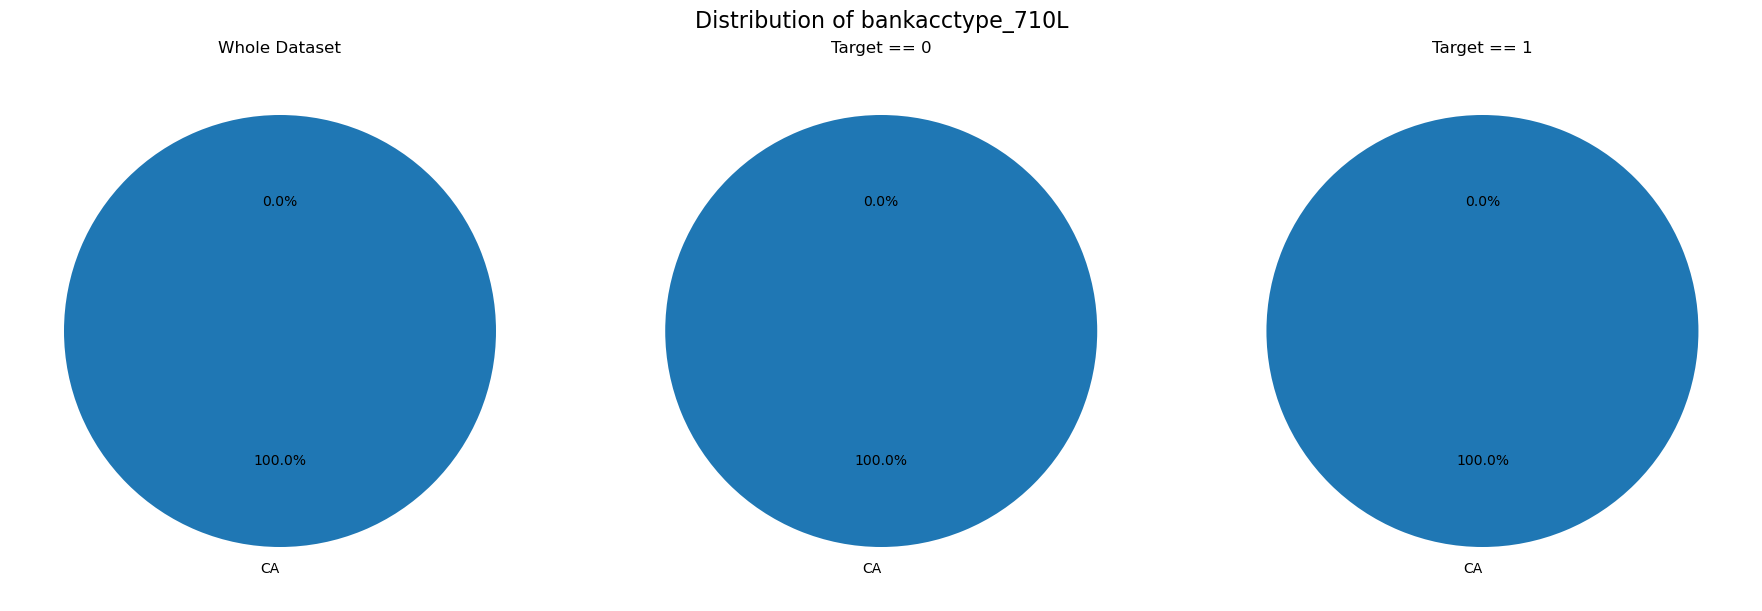

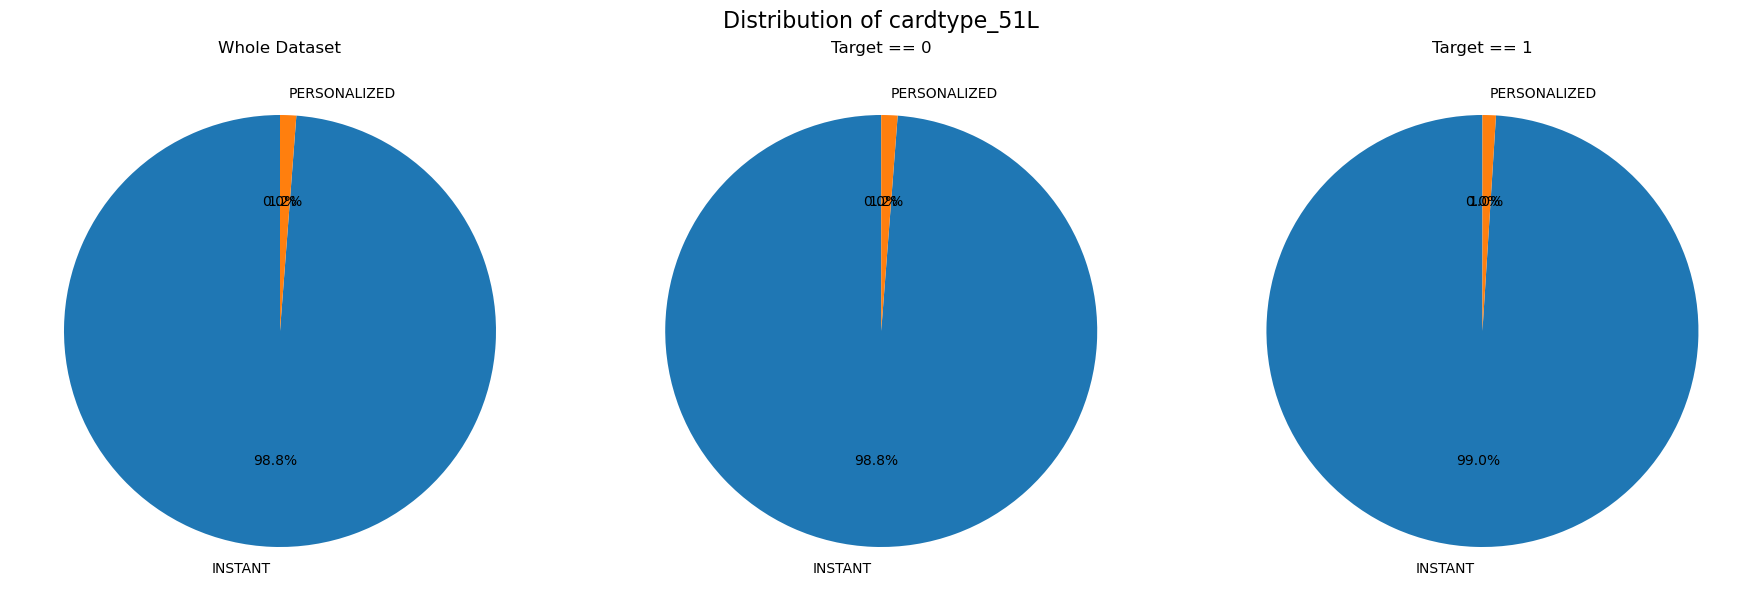

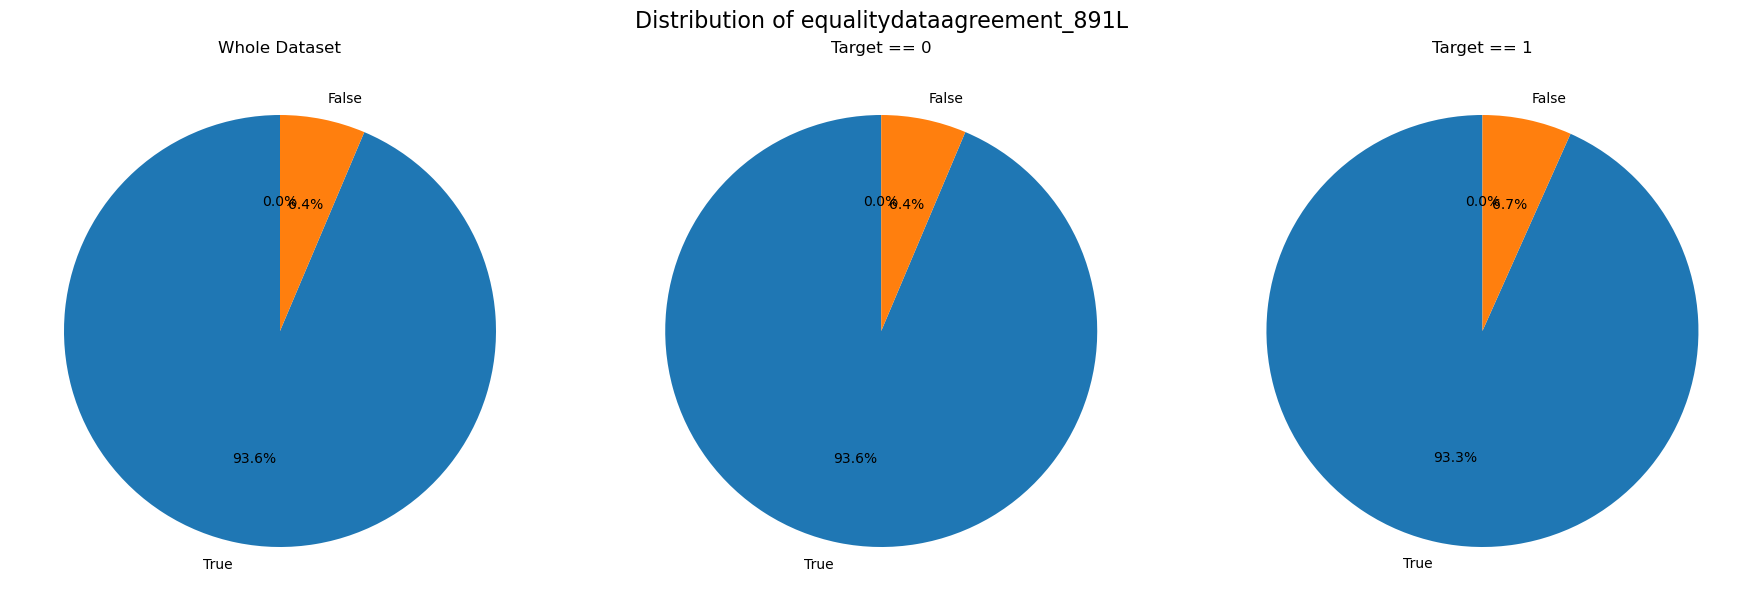

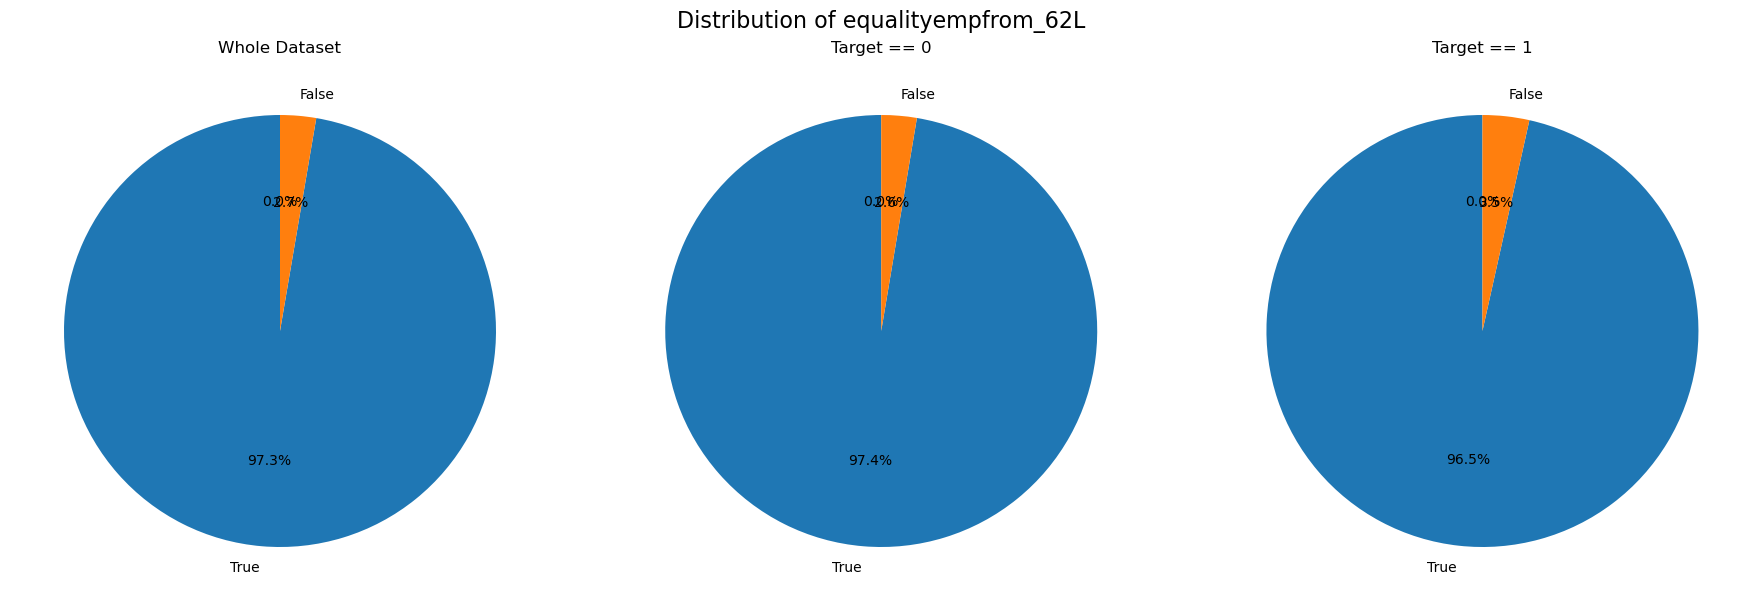

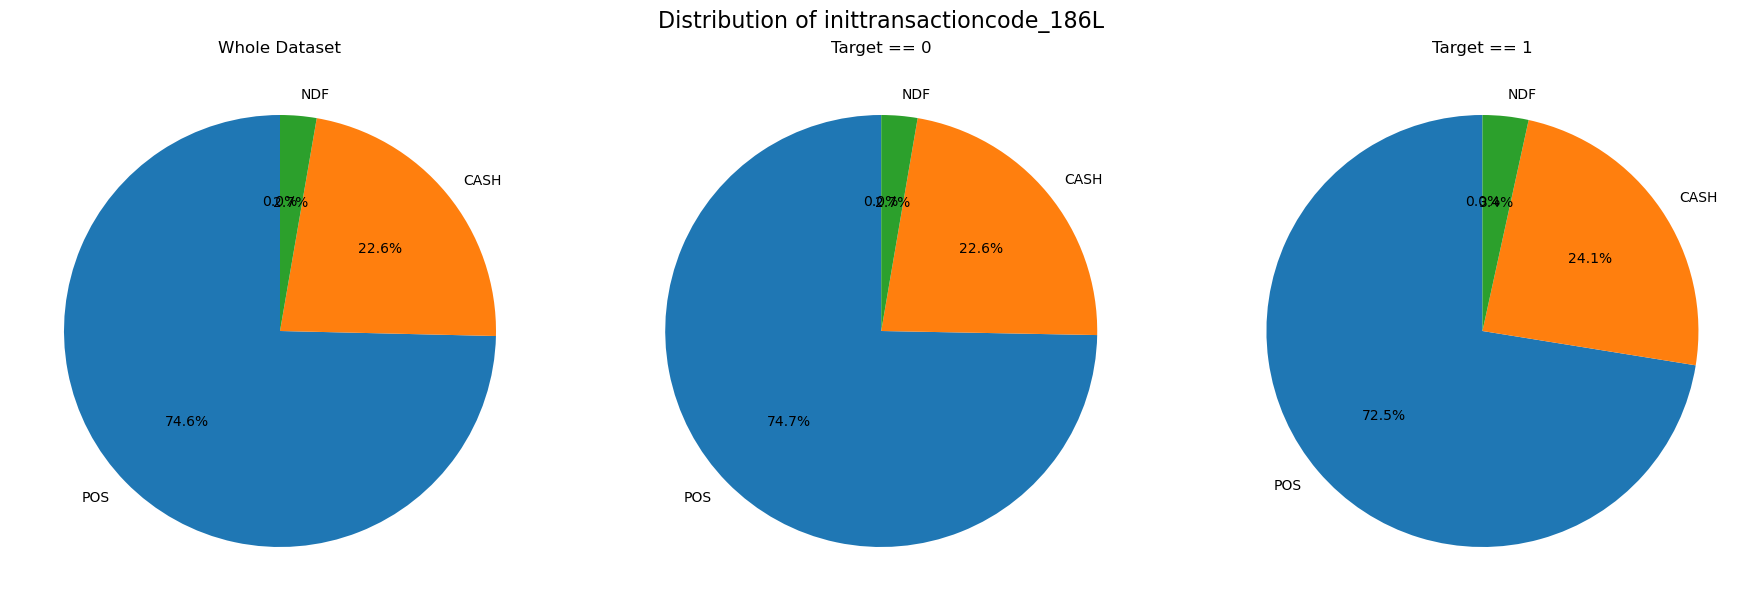

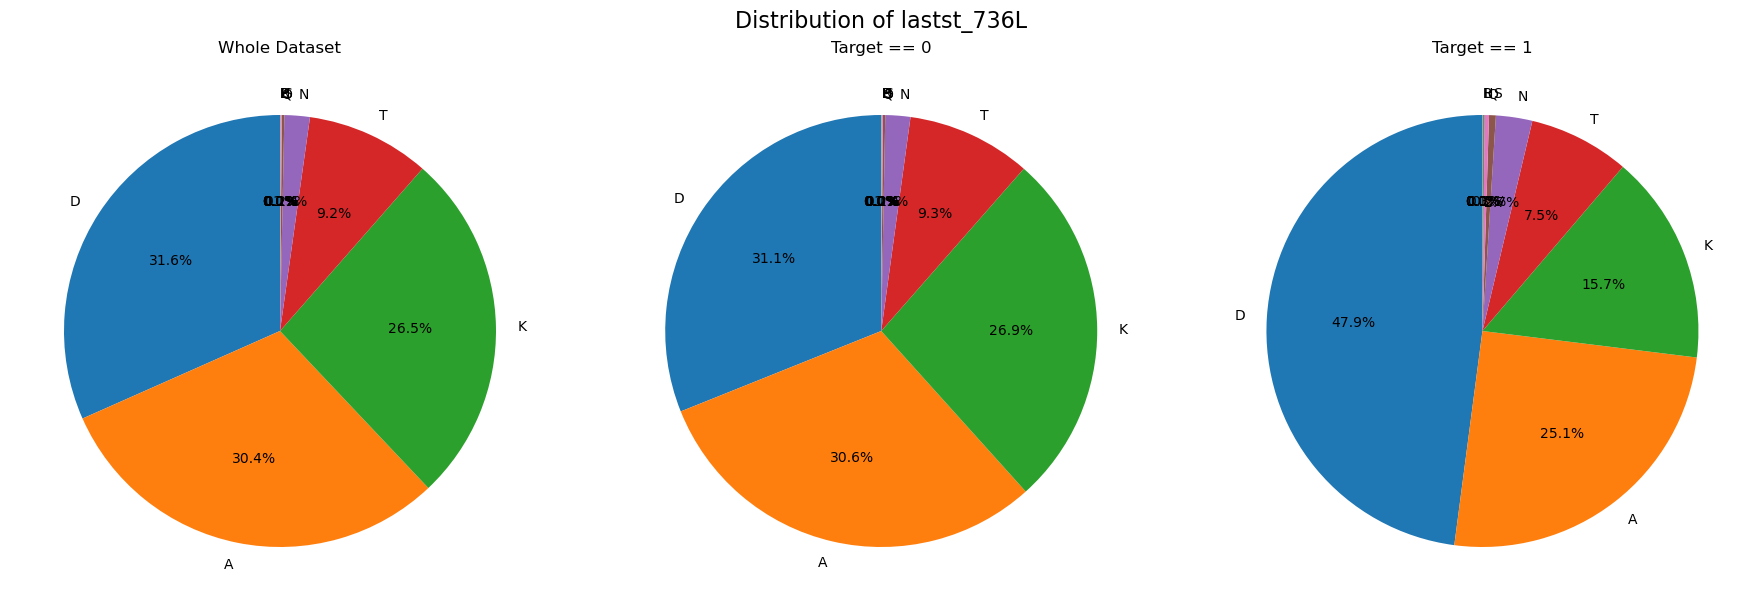

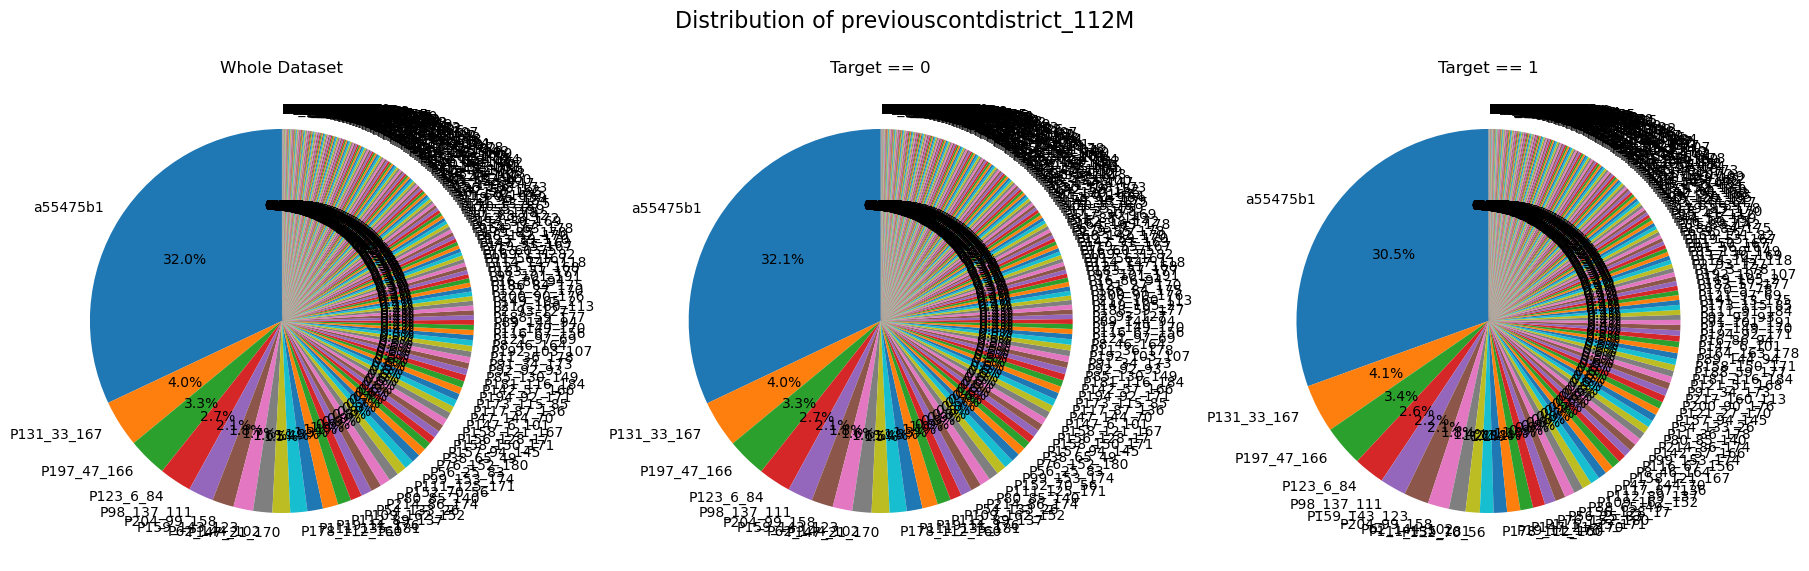

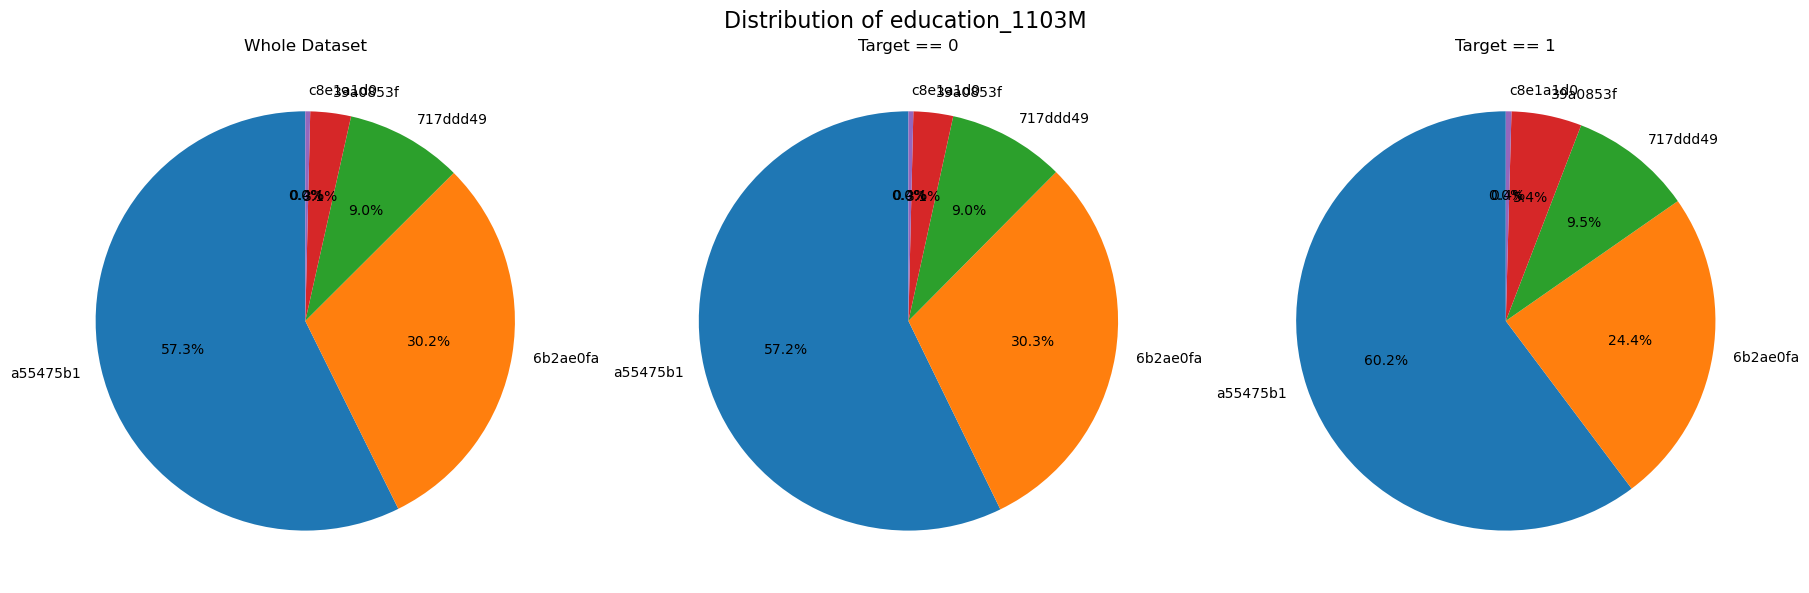

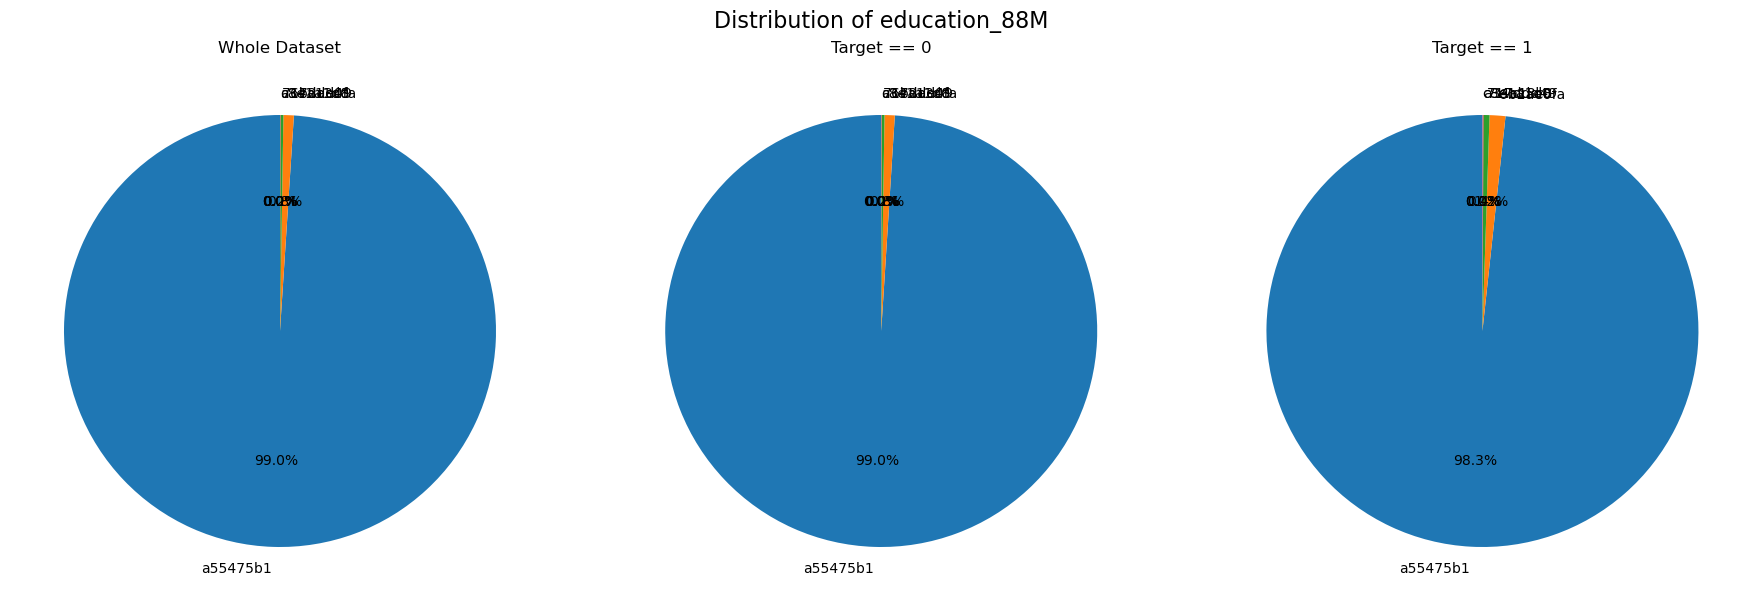

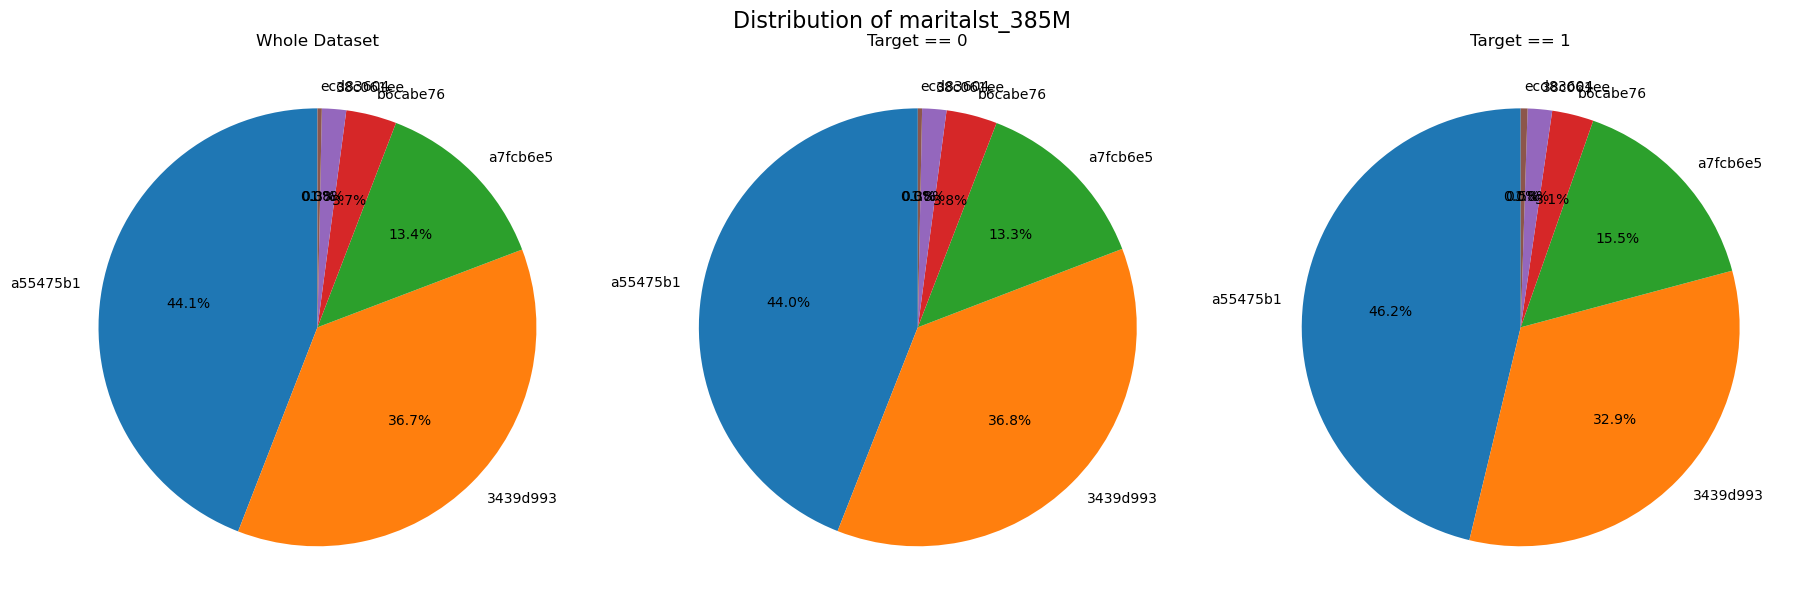

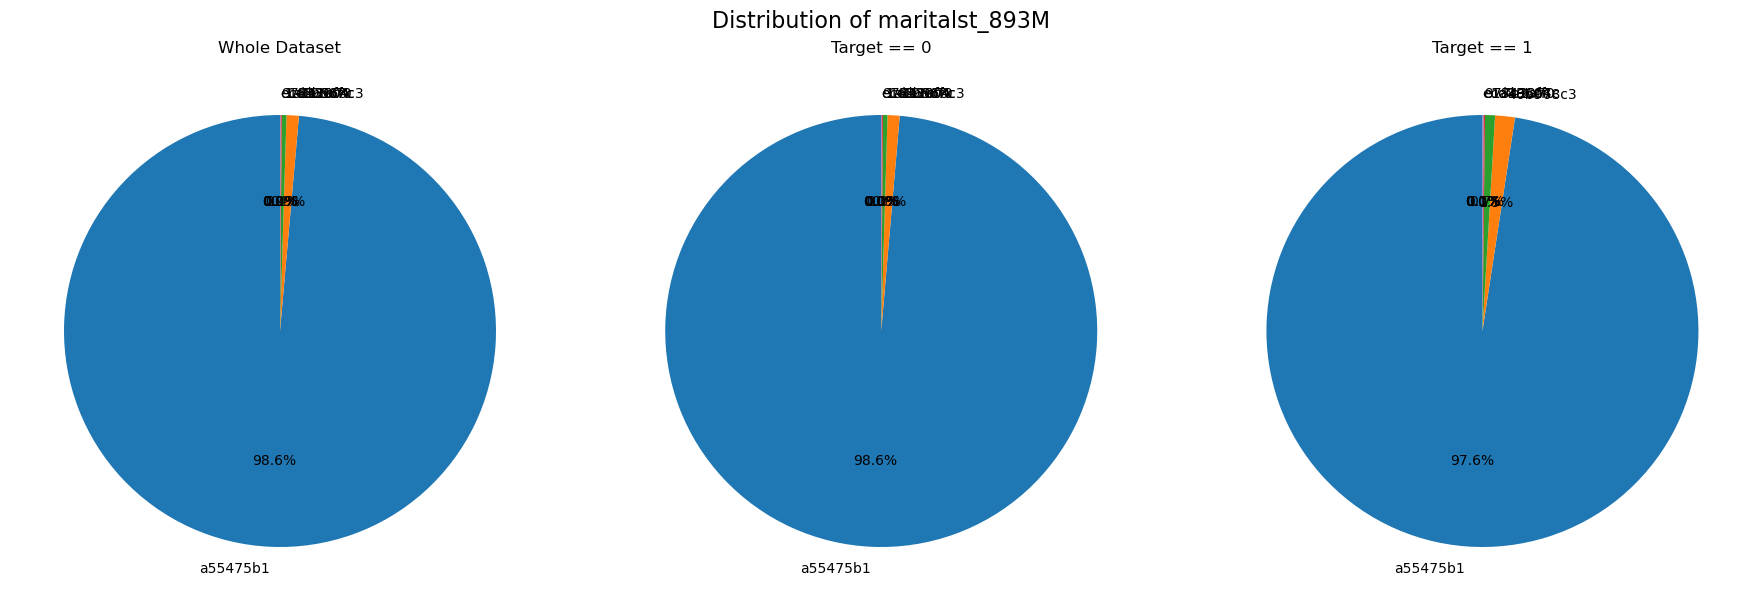

In [193]:
for feature in categorical_features:
    plot_category_distribution(feature)

We see that bankacctype_710L has only one category, so we will drop it.
Also, while the previous conracts district can offer some insights, it has a large number of categories, so we will drop it as well.

In [194]:
features_to_drop = ['bankacctype_710L', 'previouscontdistrict_112M']

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

categorical_features = [feature for feature in categorical_features if feature not in features_to_drop]

### Replacing a55475b1 with NaN
By the frequency of a55475b1, we can see that it is likely a placeholder for missing values. We will replace it with NaN.

In [195]:
# Replace a55475b1 with NaN
X_train[categorical_features] = X_train[categorical_features].replace('a55475b1', np.nan)
X_test[categorical_features] = X_test[categorical_features].replace('a55475b1', np.nan)

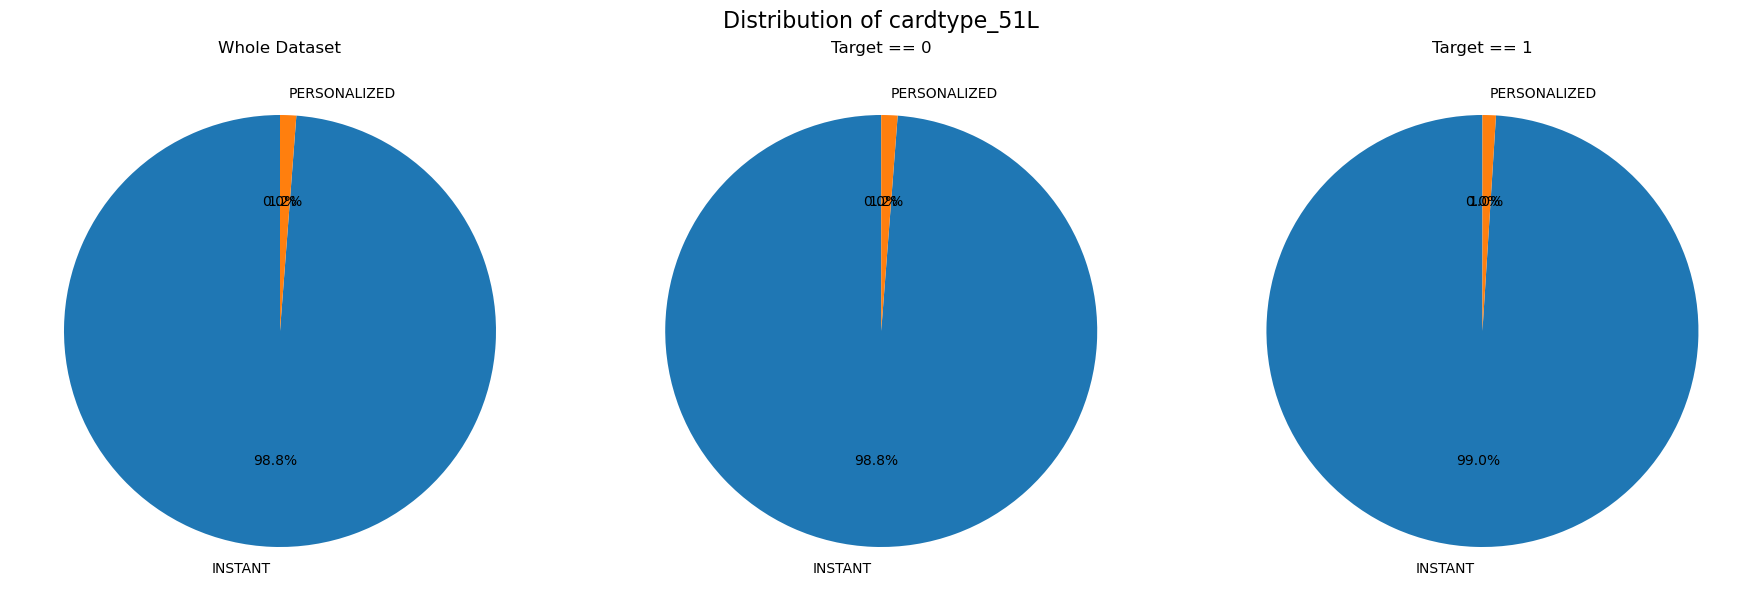

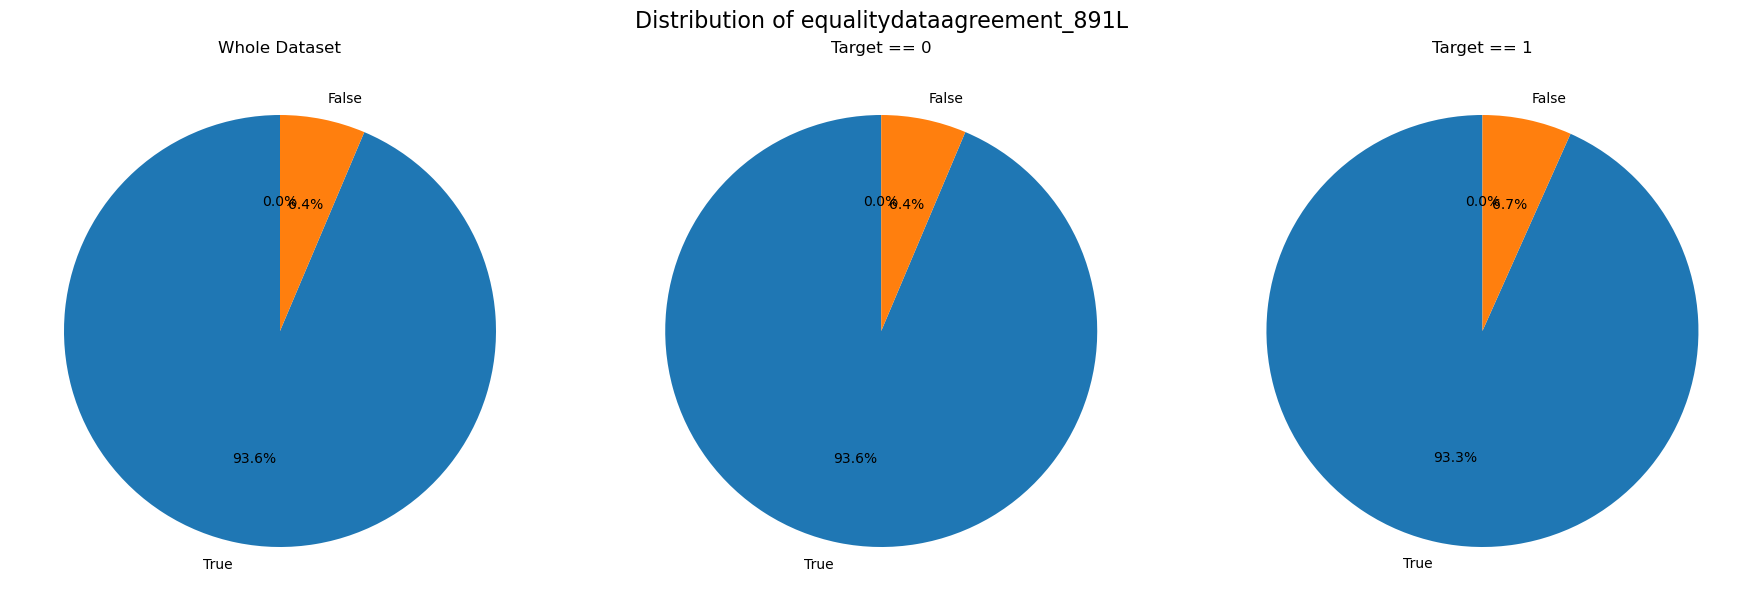

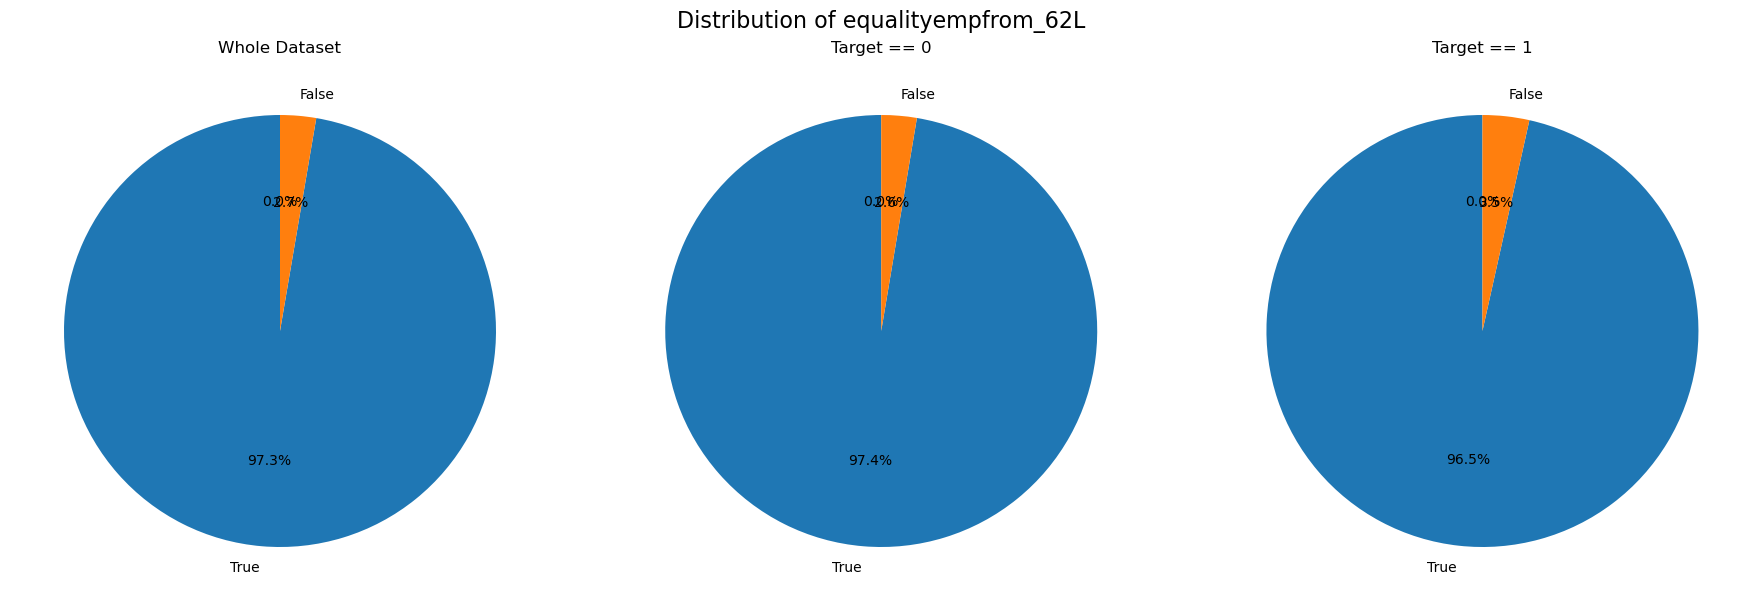

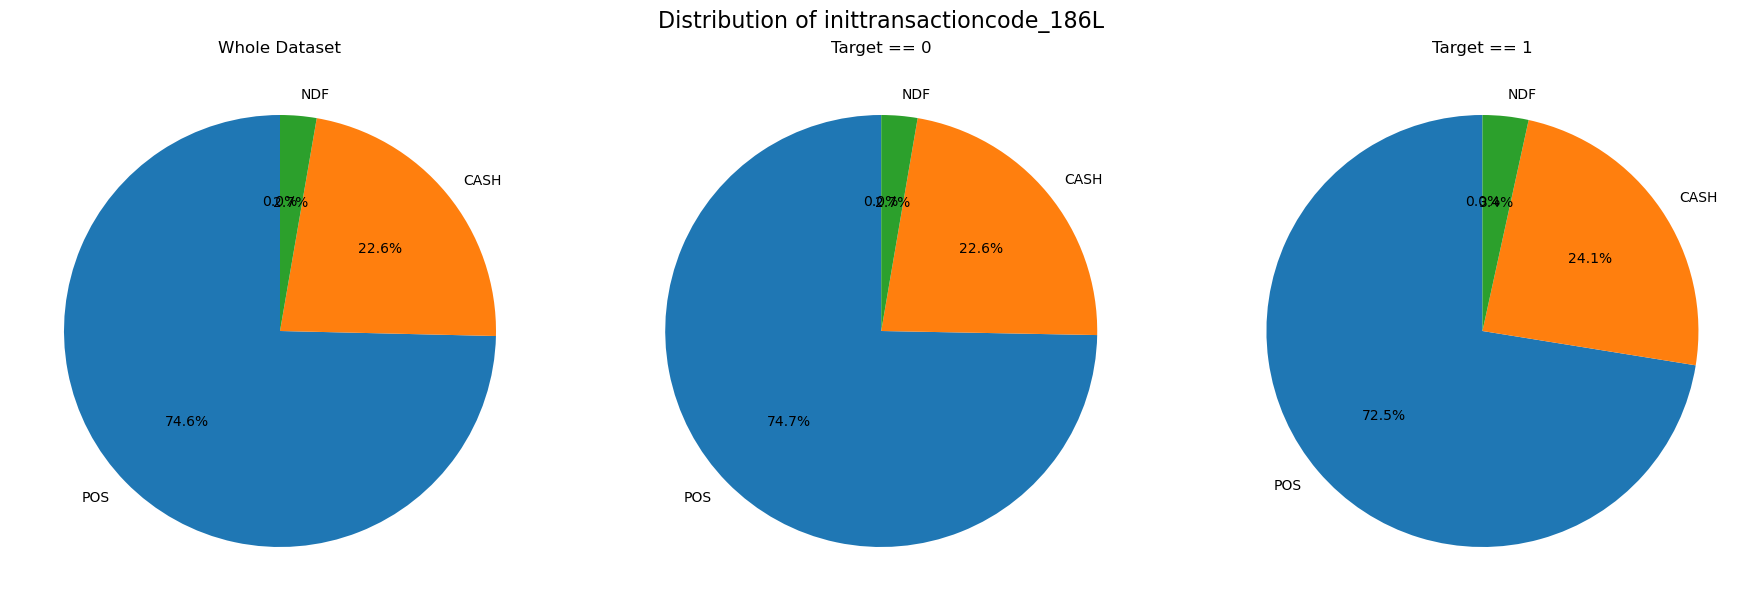

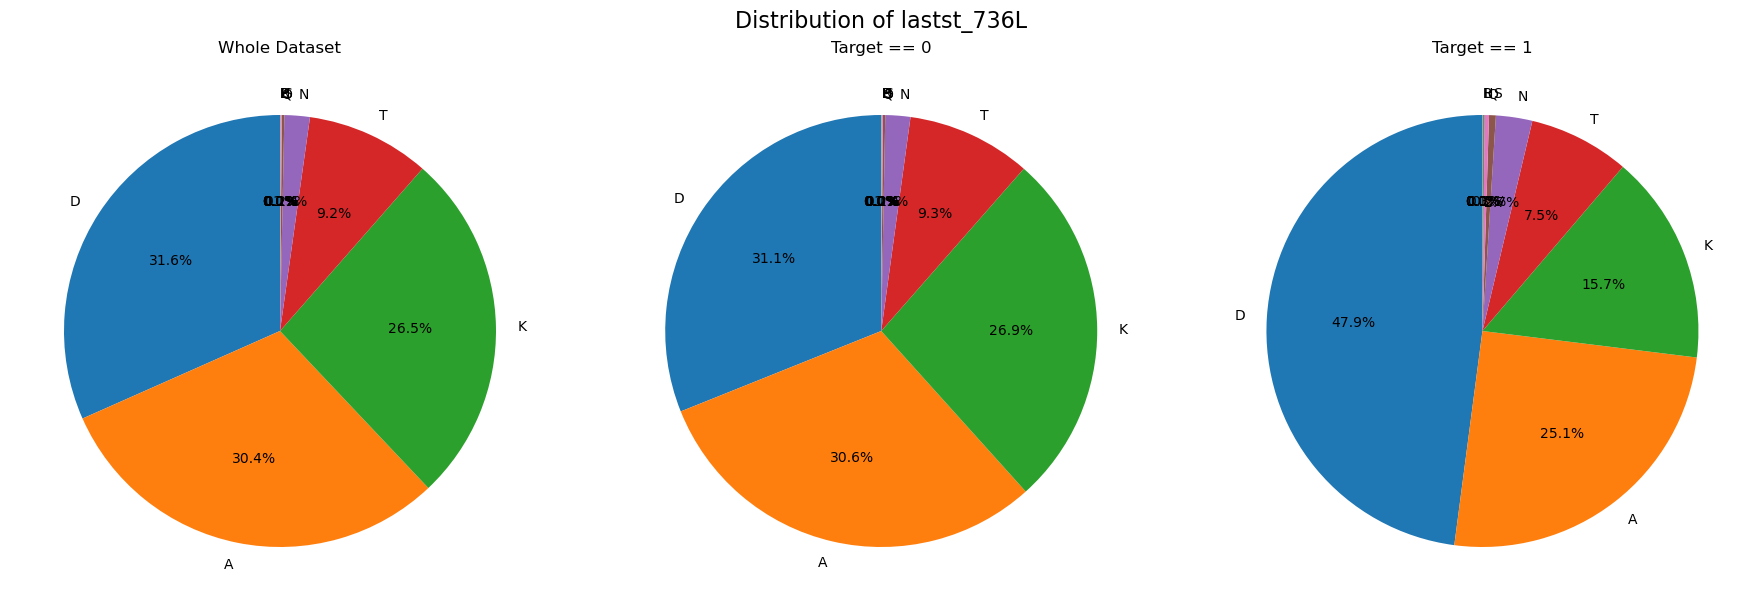

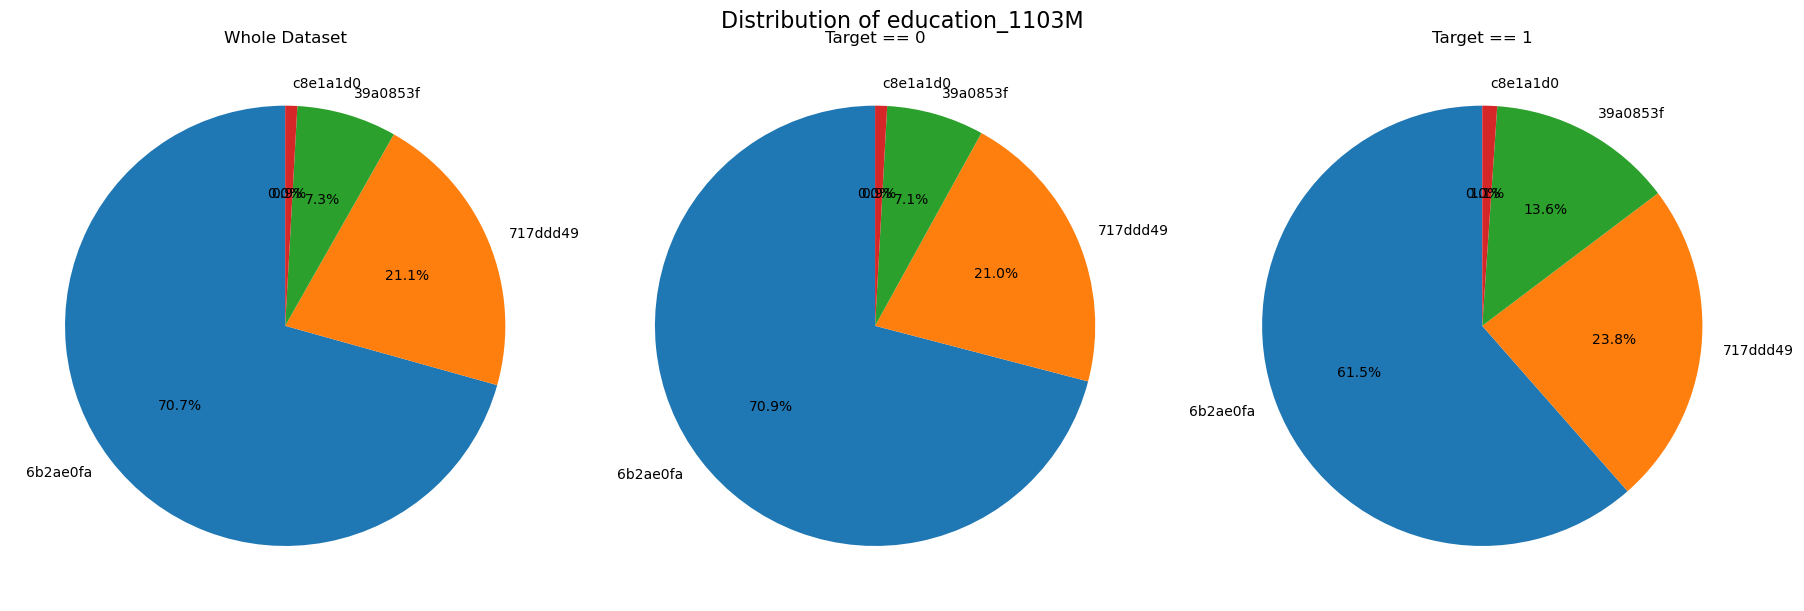

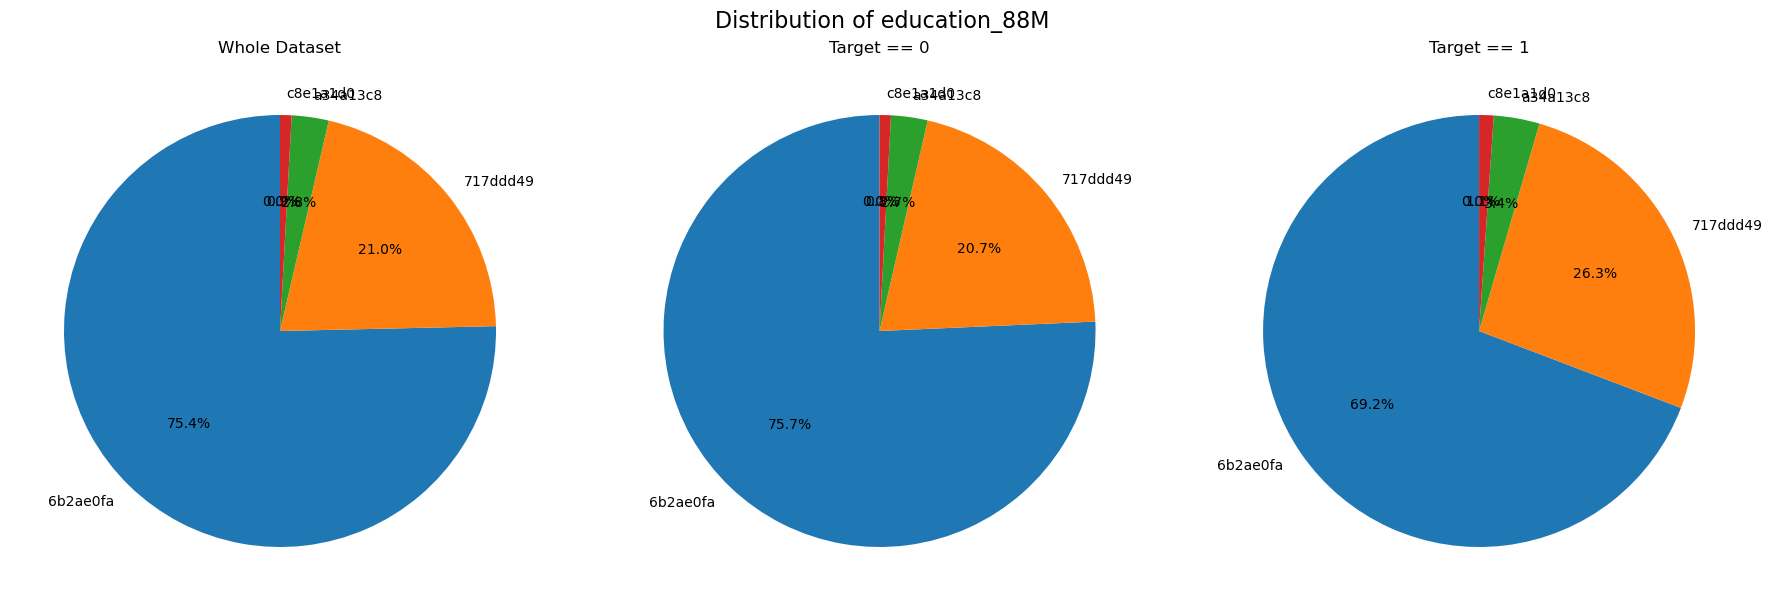

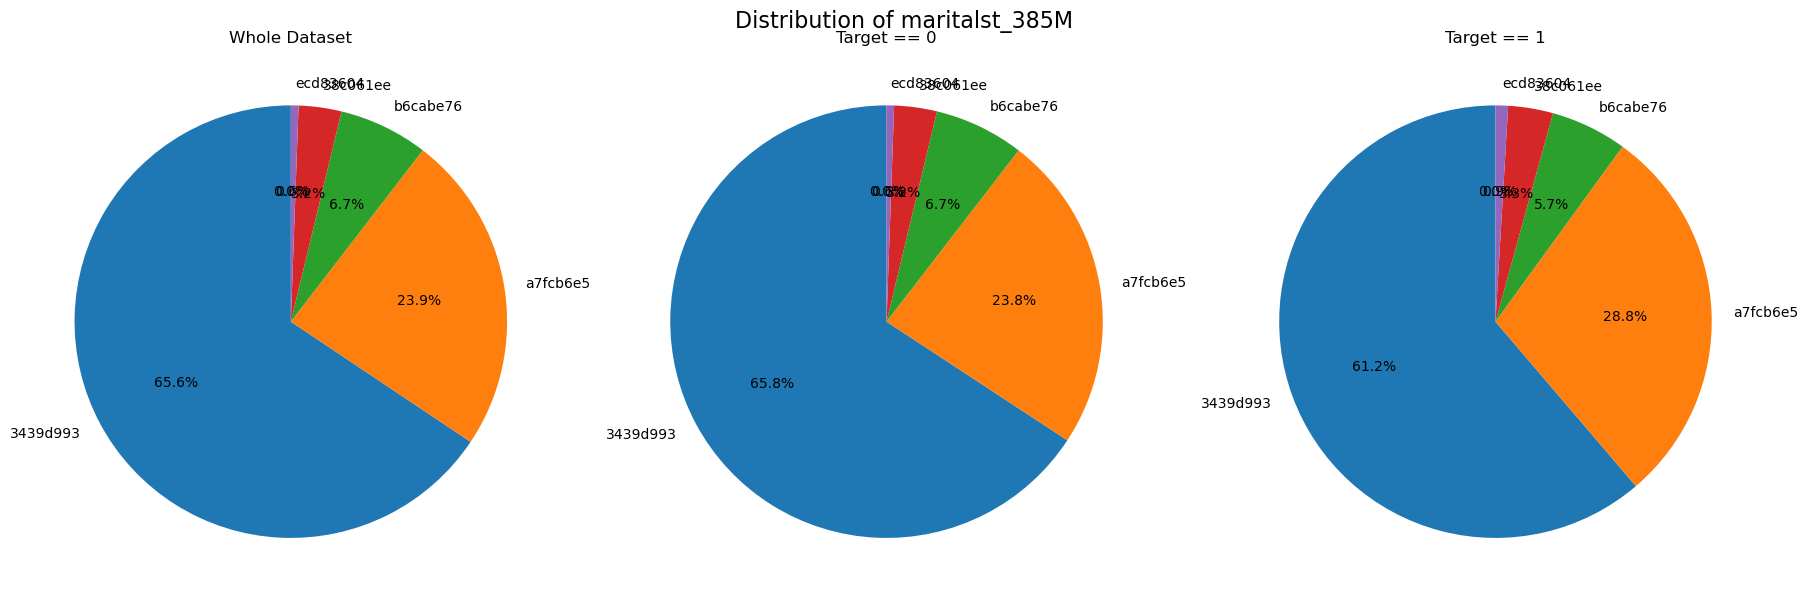

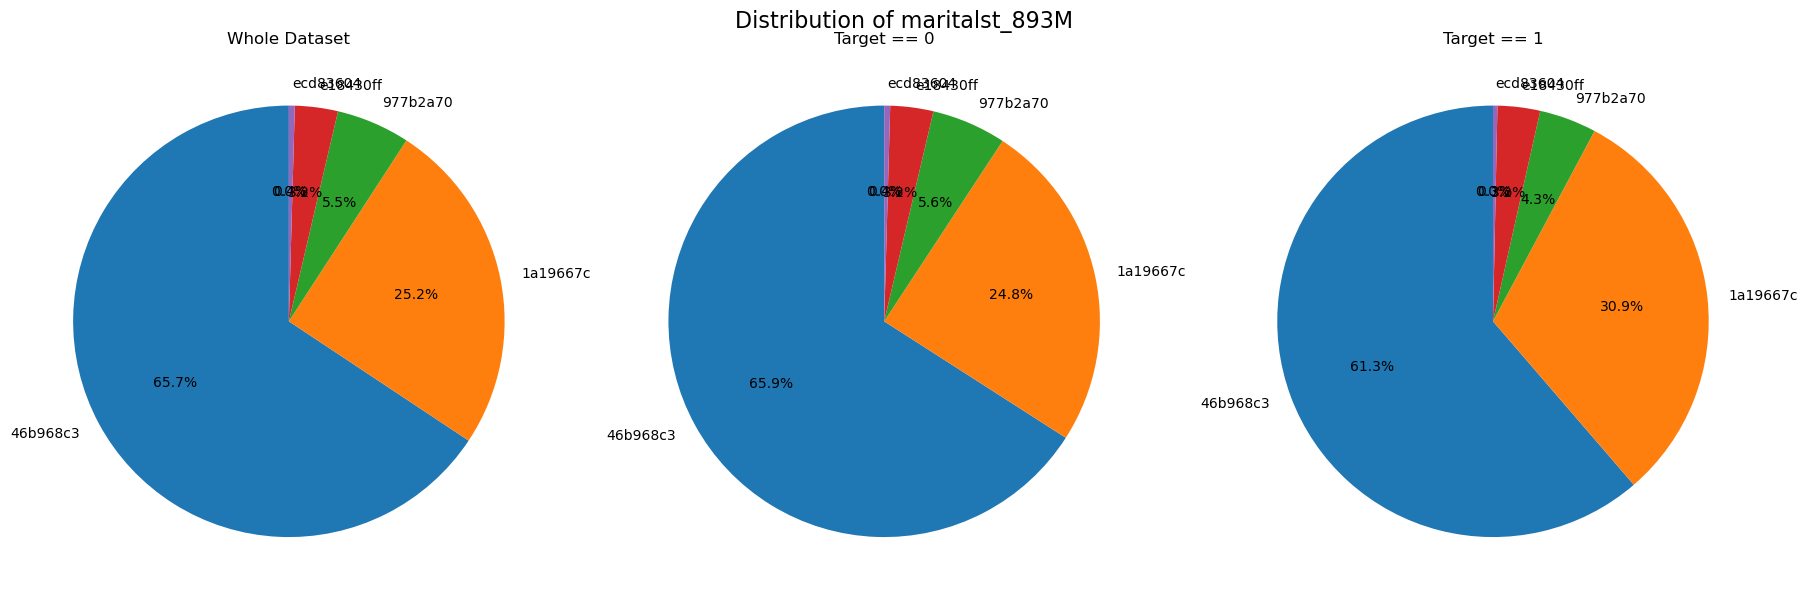

In [196]:
for feature in categorical_features:
    plot_category_distribution(feature)


In [197]:
# save the new datasets
X_train.to_pickle('data/X_train_hand_dropped_cleanCategorical.pkl')
X_test.to_pickle('data/X_test_hand_dropped_cleanCategorical.pkl')

In [198]:
feature_definitions[feature_definitions['Variable'].isin(categorical_features)]

,Variable,Description
46,cardtype_51L,Type of credit card.
159,education_1103M,Level of education of the client provided by e...
161,education_88M,Education level of the client.
174,equalitydataagreement_891L,Flag indicating sudden changes in client's soc...
175,equalityempfrom_62L,Flag indicating a sudden change in the client'...
207,inittransactioncode_186L,Transaction type of the initial credit transac...
247,lastst_736L,Status of the client's previous credit applica...
254,maritalst_385M,Marital status of the client.
256,maritalst_893M,Marital status of the client


## Feature Engineering on Categorical Features
### Discrepancies in External vs Internal Data (BIG ASSUMPTION)
Some features (maritalst and education) have records from external data that are different in the internal data. We add a new feature to indicate whether there is a discrepancy.
#### Big Assumption:
Since in this dataset some categorical features are masked, they have different values in the internal and external data. 
We assume that both follow the same distribution and hence set the category names to be the same.
Moreover, for marital and education status we assume that the distribution is equivalent to data available online (X) and hence we set the category names to be equal to the distribution online.

In [199]:
# Speculative mapping based on real distributions
category_mapping = {
    '3439d993': 'Single',  
    '46b968c3': 'Single',
    'a7fcb6e5': 'Married',  
    '1a19667c': 'Married',
    'b6cabe76': 'Divorced',
    '977b2a70': 'Divorced',
    '38c061ee': 'Widowed',
    'e18430ff': 'Widowed',
    'ecd83604': 'Other',
}

# Apply the mapping to the marital status column
X_train['maritalst_893M'] = X_train['maritalst_893M'].replace(category_mapping)
X_train['maritalst_385M'] = X_train['maritalst_385M'].replace(category_mapping)
X_test['maritalst_893M'] = X_test['maritalst_893M'].replace(category_mapping)
X_test['maritalst_385M'] = X_test['maritalst_385M'].replace(category_mapping)

In [200]:
# Mapping of masked codes to speculated education levels
education_mapping = {
    '6b2ae0fa': 'High School Completed',
    '717ddd49': 'Bachelor\'s Degree',
    '39a0853f': 'Master\'s Degree',
    'a34a13c8': 'High School Completed',
    'c8e1a1d0': 'Doctorate'
}

# Apply the mapping to the education level column
X_train['education_1103M'] = X_train['education_1103M'].replace(education_mapping)
X_train['education_88M'] = X_train['education_88M'].replace(education_mapping)
X_test['education_1103M'] = X_test['education_1103M'].replace(education_mapping)
X_test['education_88M'] = X_test['education_88M'].replace(education_mapping)

#### Add discrepancy columns

In [201]:
# Create a mask where neither column has NaN values
valid_data_mask = X_train['maritalst_385M'].notna() & X_train['maritalst_893M'].notna()

# Perform the comparison only on rows where both columns have valid (non-NaN) data
X_train['maritalst_discrepancy'] = valid_data_mask & (X_train['maritalst_385M'].astype(str) != X_train['maritalst_893M'].astype(str))

# Create a mask where neither column has NaN values
valid_data_mask = X_train['education_1103M'].notna() & X_train['education_88M'].notna()

# Perform the comparison only on rows where both columns have valid (non-NaN) data
X_train['education_discrepancy'] = valid_data_mask & (X_train['education_1103M'].astype(str) != X_train['education_88M'].astype(str))

In [202]:
# add these two to the feature definitions
feature_definitions = feature_definitions.append({
    'Variable': 'maritalst_discrepancy',
    'Description': 'Discrepancy in marital status between internal and external data'
}, ignore_index=True)

feature_definitions = feature_definitions.append({
    'Variable': 'education_discrepancy',
    'Description': 'Discrepancy in education level between internal and external data'
}, ignore_index=True)

/var/folders/3z/7fcw3rc512d4pscjrc0tq66w0000gn/T/ipykernel_48101/1970591759.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_definitions = feature_definitions.append({
/var/folders/3z/7fcw3rc512d4pscjrc0tq66w0000gn/T/ipykernel_48101/1970591759.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_definitions = feature_definitions.append({


In [203]:
X_train['maritalst_discrepancy'].value_counts()

False    1220858
True         469
Name: maritalst_discrepancy, dtype: int64

In [224]:
X_train['education_discrepancy'].value_counts()

False    1220421
True         906
Name: education_discrepancy, dtype: int64

In [225]:
X_train[y_train == 1]['maritalst_discrepancy'].value_counts()

False    38302
True        49
Name: maritalst_discrepancy, dtype: int64

In [222]:
X_train[y_train == 1]['education_discrepancy'].value_counts()

False    38261
True        90
Name: education_discrepancy, dtype: int64

In [205]:
# save the new datasets
X_train.to_pickle('data/X_train_hand_dropped_cleanCategorical_featureEngineered.pkl')
X_test.to_pickle('data/X_test_hand_dropped_cleanCategorical_featureEngineered.pkl')

## Missing Categorical Values

In [206]:
X_train = pd.read_pickle('data/X_train_hand_dropped_cleanCategorical_featureEngineered.pkl')
X_test = pd.read_pickle('data/X_test_hand_dropped_cleanCategorical_featureEngineered.pkl')

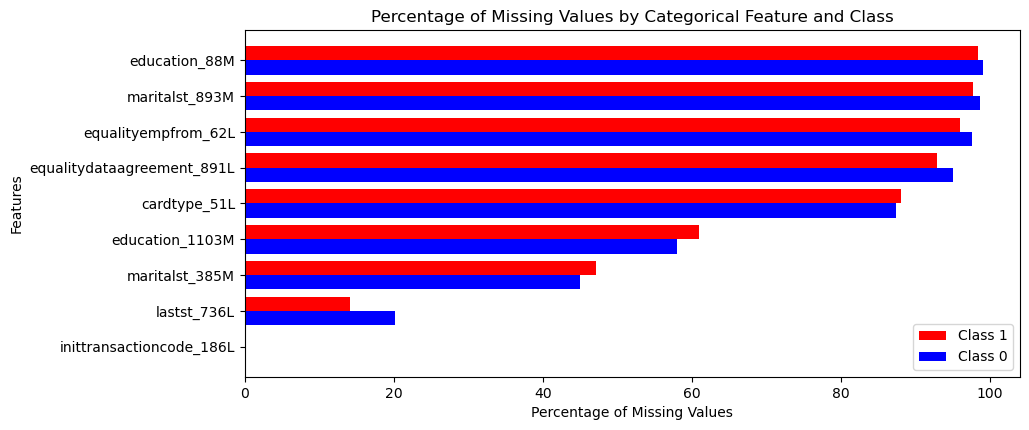

,PercentageMissing,Class 1 Missing,Class 0 Missing,Description
education_88M,98.991589,98.323381,99.013251,Education level of the client.
maritalst_893M,98.624120,97.627181,98.656439,Marital status of the client
equalityempfrom_62L,97.525560,95.963599,97.576198,Flag indicating a sudden change in the client'...
equalitydataagreement_891L,94.903331,92.824177,94.970735,Flag indicating sudden changes in client's soc...
cardtype_51L,87.443084,87.995098,87.425189,Type of credit card.
education_1103M,58.051529,60.908451,57.958910,Level of education of the client provided by e...
maritalst_385M,45.058039,47.125238,44.991023,Marital status of the client.
lastst_736L,20.000459,14.075252,20.192548,Status of the client's previous credit applica...
inittransactioncode_186L,0.000082,0.000000,0.000085,Transaction type of the initial credit transac...


In [211]:
X_train_categorical = X_train[categorical_features]

# Calculate the percentage of missing values for each categorical feature overall and within each class
total_missing = X_train_categorical.isnull().mean() * 100
class_1_missing = X_train_categorical[y_train == 1].isnull().mean() * 100
class_0_missing = X_train_categorical[y_train == 0].isnull().mean() * 100

# Assuming 'feature_definitions' is a DataFrame with your feature descriptions


missing_df = pd.DataFrame({
    'PercentageMissing': total_missing.values,
    'Class 1 Missing': class_1_missing.values,
    'Class 0 Missing': class_0_missing.values,
    'Description': feature_definitions.set_index('Variable').loc[total_missing.index, 'Description']

})

# Filter out features with 0% or more missing values to see all categorical features
missing_df = missing_df[missing_df['PercentageMissing'] >= 0]

# Sort the DataFrame by the total missing values to maintain the order for plotting
missing_df.sort_values(by='PercentageMissing', ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(missing_df) / 2))  # Adjust figure size dynamically
ind = np.arange(len(missing_df))  # the x locations for the groups
width = 0.4  # the width of the bars

p1 = ax.barh(ind, missing_df['Class 1 Missing'], width, color='red', label='Class 1')
p2 = ax.barh(ind + width, missing_df['Class 0 Missing'], width, color='blue', label='Class 0')

ax.set_title('Percentage of Missing Values by Categorical Feature and Class')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(missing_df.index)  # Using descriptions as labels
ax.legend()

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

# Inverting y-axis to have the feature with most missing values on top
plt.gca().invert_yaxis()

plt.show()

missing_df

Given that cardtype_51L, equalityempfrom_62L and equalitydataagreement_891L have more than 80% missing values, we will drop them.

In [212]:
X_train = X_train.drop(columns=['cardtype_51L', 'equalityempfrom_62L', 'equalitydataagreement_891L'])
X_test = X_test.drop(columns=['cardtype_51L', 'equalityempfrom_62L', 'equalitydataagreement_891L'])
categorical_features = [feature for feature in categorical_features if feature not in ['cardtype_51L', 'equalityempfrom_62L', 'equalitydataagreement_891L']]

Also, we can observe that education_88M and maritalst_893M have missing values. This is likely due to the fact that they originate from external sources. We attempt to merge the external data with the internal data: The external columns will be dropped and all missing values of internal data will be replaced with external data if available.

In [213]:
X_train['maritalst_385M'] = X_train['maritalst_385M'].astype(str).fillna(X_train['maritalst_893M'].astype(str))
X_train = X_train.drop(columns=['maritalst_893M'])
X_train['maritalst_385M'] = X_train['maritalst_385M'].astype('category')

X_test['maritalst_385M'] = X_test['maritalst_385M'].astype(str).fillna(X_test['maritalst_893M'].astype(str))
X_test = X_test.drop(columns=['maritalst_893M'])
X_test['maritalst_385M'] = X_test['maritalst_385M'].astype('category')


X_train['education_1103M'] = X_train['education_1103M'].astype(str).fillna(X_train['education_88M'].astype(str))
X_train = X_train.drop(columns=['education_88M'])
X_train['education_1103M'] = X_train['education_1103M'].astype('category')

X_test['education_1103M'] = X_test['education_1103M'].astype(str).fillna(X_test['education_88M'].astype(str))
X_test = X_test.drop(columns=['education_88M'])
X_test['education_1103M'] = X_test['education_1103M'].astype('category')

categorical_features = [feature for feature in categorical_features if feature not in ['maritalst_893M', 'education_88M']]

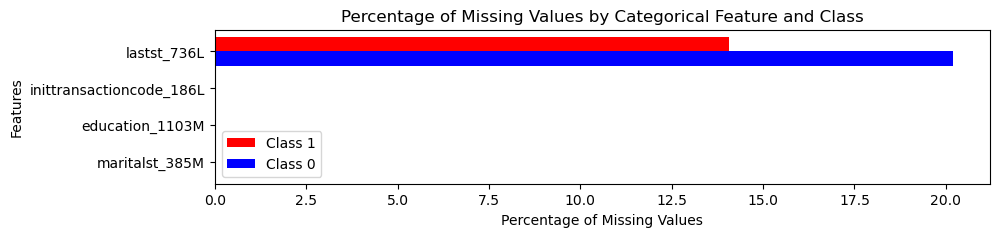

,PercentageMissing,Class 1 Missing,Class 0 Missing,Description
lastst_736L,20.000459,14.075252,20.192548,Status of the client's previous credit applica...
inittransactioncode_186L,0.000082,0.000000,0.000085,Transaction type of the initial credit transac...
education_1103M,0.000000,0.000000,0.000000,Level of education of the client provided by e...
maritalst_385M,0.000000,0.000000,0.000000,Marital status of the client.


In [215]:
X_train_categorical = X_train[categorical_features]

# Calculate the percentage of missing values for each categorical feature overall and within each class
total_missing = X_train_categorical.isnull().mean() * 100
class_1_missing = X_train_categorical[y_train == 1].isnull().mean() * 100
class_0_missing = X_train_categorical[y_train == 0].isnull().mean() * 100

# Assuming 'feature_definitions' is a DataFrame with your feature descriptions


missing_df = pd.DataFrame({
    'PercentageMissing': total_missing.values,
    'Class 1 Missing': class_1_missing.values,
    'Class 0 Missing': class_0_missing.values,
    'Description': feature_definitions.set_index('Variable').loc[total_missing.index, 'Description']
})

# Filter out features with 0% or more missing values to see all categorical features
missing_df = missing_df[missing_df['PercentageMissing'] >= 0]

# Sort the DataFrame by the total missing values to maintain the order for plotting
missing_df.sort_values(by='PercentageMissing', ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(missing_df) / 2))  # Adjust figure size dynamically
ind = np.arange(len(missing_df))  # the x locations for the groups
width = 0.4  # the width of the bars

p1 = ax.barh(ind, missing_df['Class 1 Missing'], width, color='red', label='Class 1')
p2 = ax.barh(ind + width, missing_df['Class 0 Missing'], width, color='blue', label='Class 0')

ax.set_title('Percentage of Missing Values by Categorical Feature and Class')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(missing_df.index)  # Using descriptions as labels
ax.legend()

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

# Inverting y-axis to have the feature with most missing values on top
plt.gca().invert_yaxis()

plt.show()

missing_df

In [216]:
# save the new datasets
X_train.to_pickle('data/X_train_hand_dropped_cleanCategorical_featureEngineered_missingValues.pkl')
X_test.to_pickle('data/X_test_hand_dropped_cleanCategorical_featureEngineered_missingValues.pkl')

In [221]:
# TODO: From Plot Above we can see that in the future, lastst_736L should be imputed (as well as the other)

# Date Features

In [218]:
# TODO:

# Numerical Features

In [219]:
# TODO: